## We are doing an EDA on the dataset to check what are the dependent variables and how they are distributed, along with correlations with each other and finally proceeding with fitting regression models that is linear regression, random forest and support vector regressors.

In [27]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

##### Loading the data set and converting it to a pandas dataframe for analysis. It is done to check for information on null values if any, statistics of the columns, shape of the data, the features that are available and the data types etc.

In [11]:
data = datasets.load_diabetes()


In [12]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [19]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [13]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [14]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [20]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## Checking the distribution pairwise, for example age vs s1, sex vs s2, age vs sex etc.

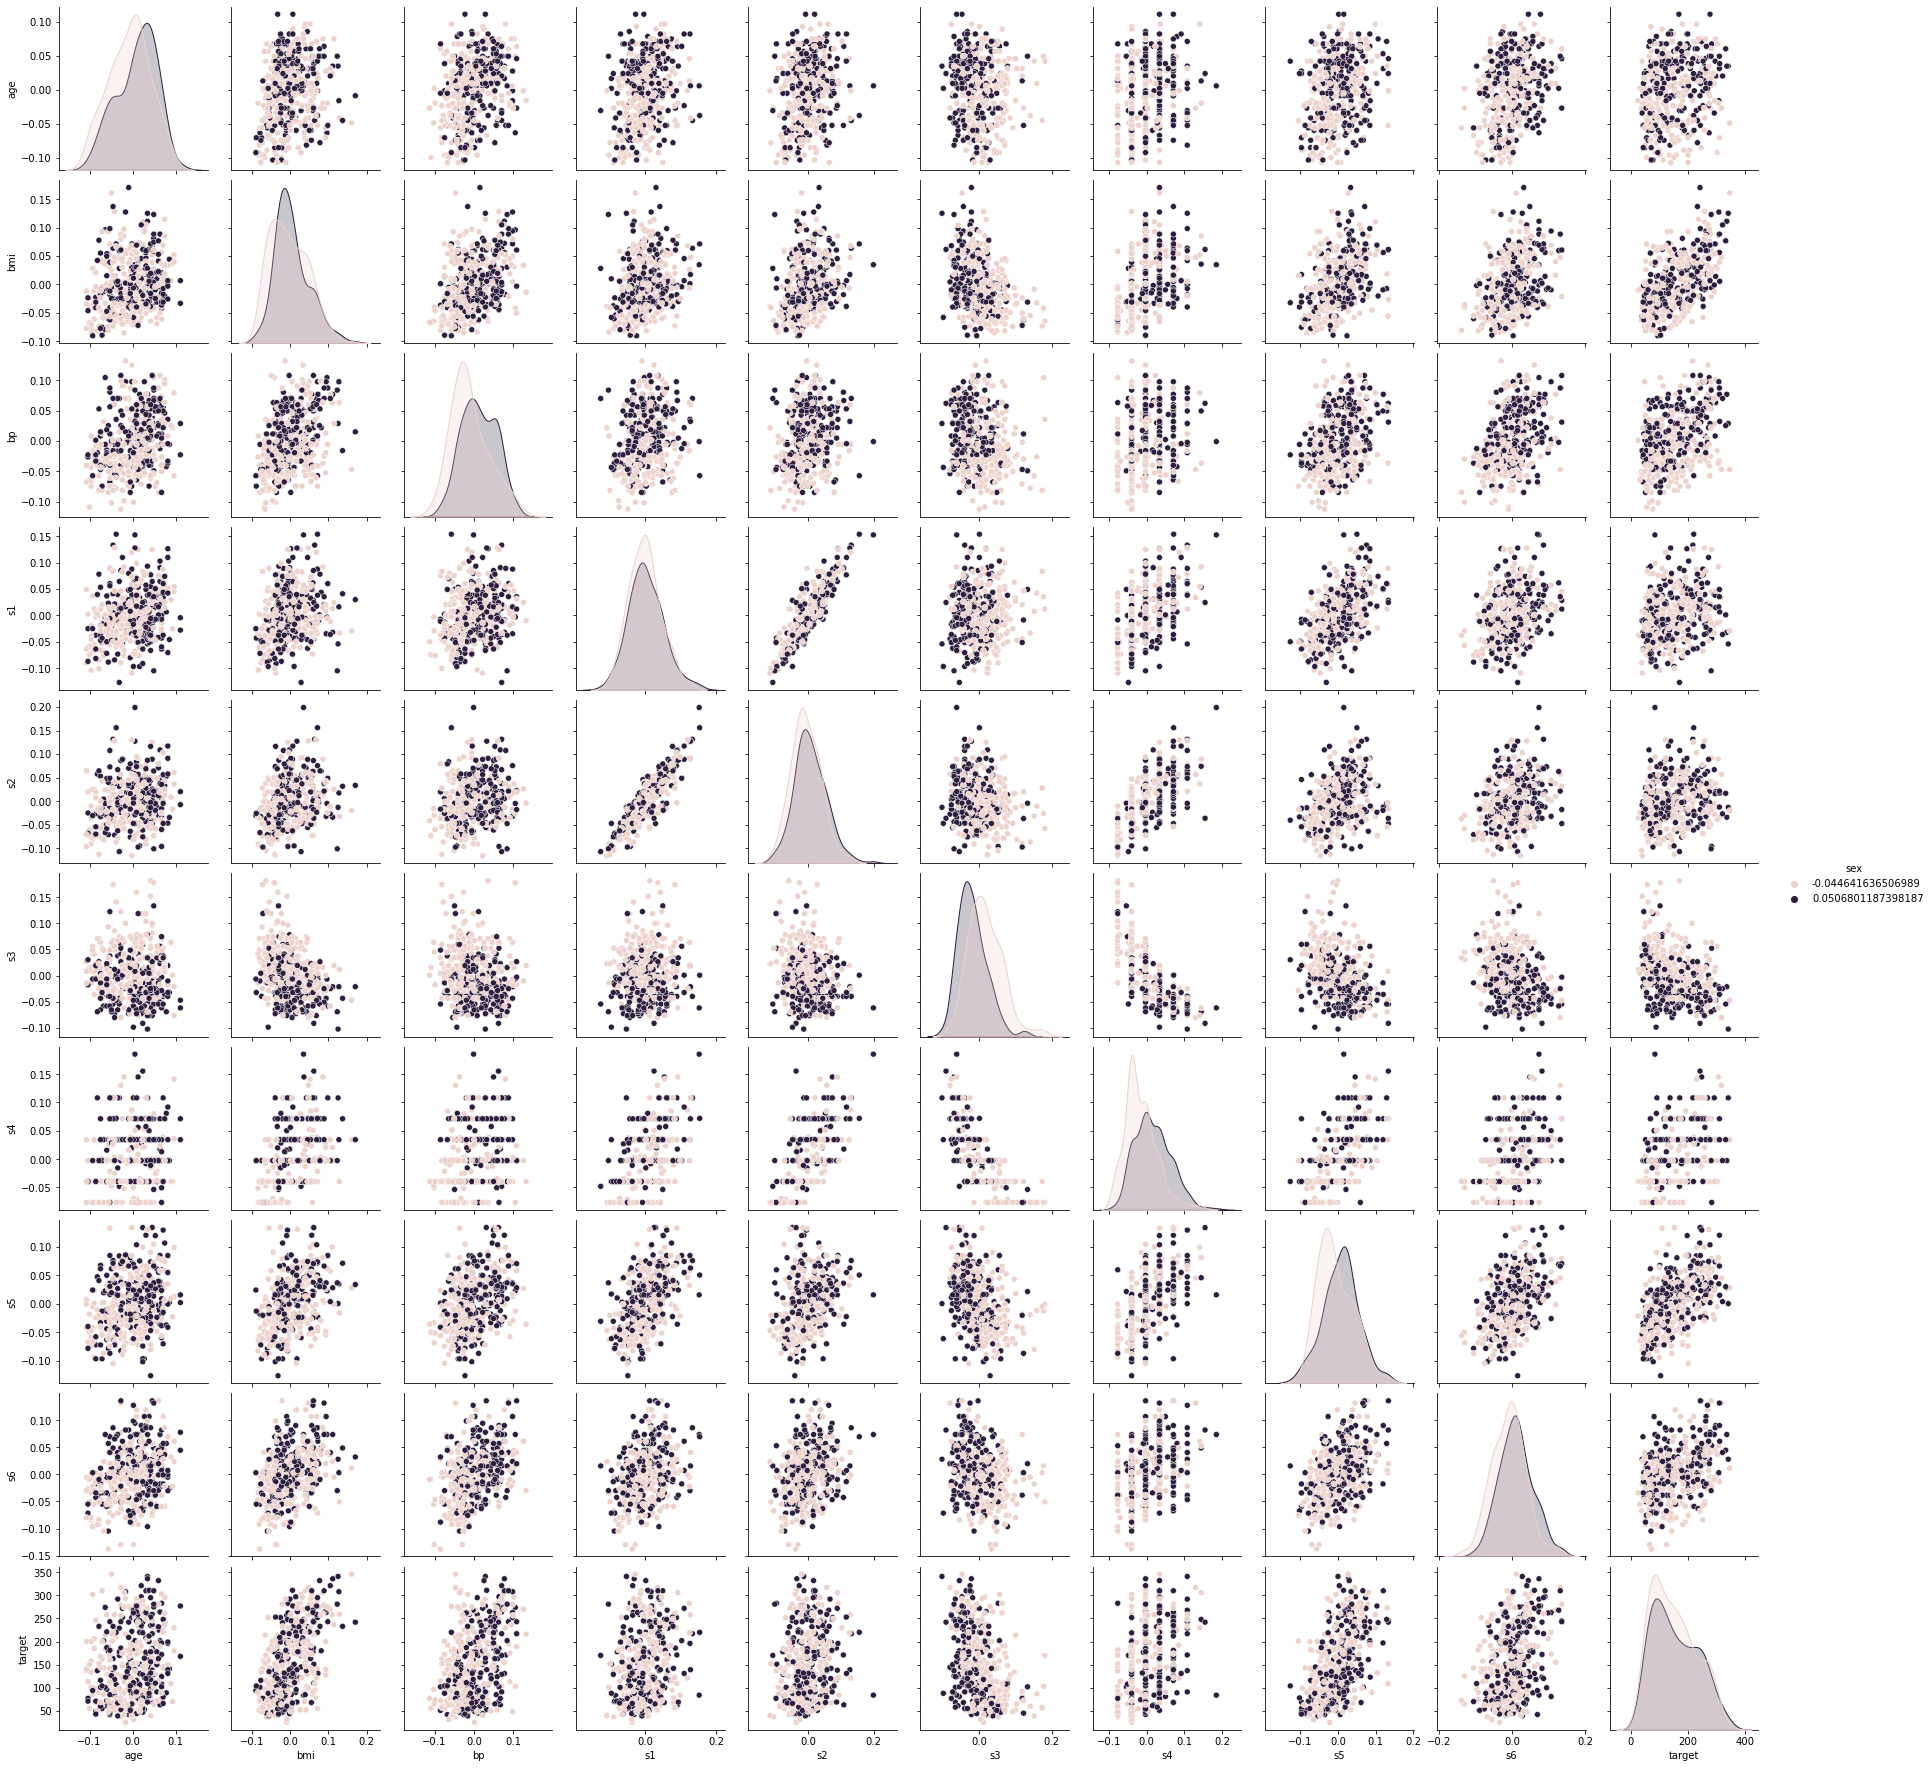

In [22]:
sns.pairplot(df, hue='sex')
plt.show()

### We can see below that age, sex here have a low correlation with the target, so dropping it


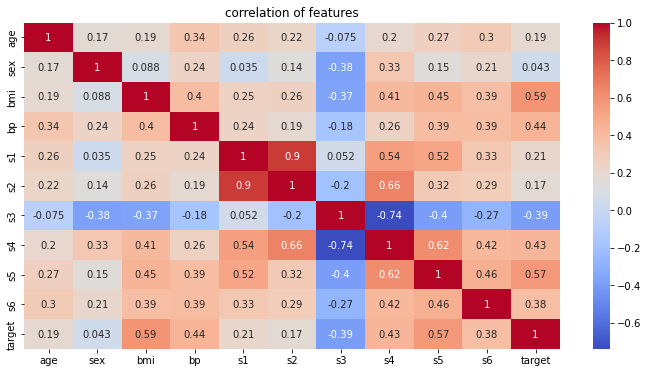

In [25]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('correlation of features')
plt.show()

## Checking if the dataset is balanced
It looks alright to proceed with our prediction models.

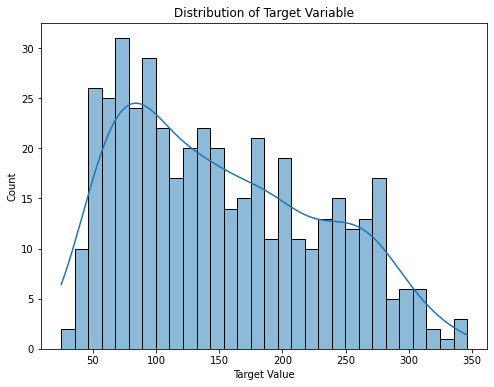

In [28]:
# Histogram of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.show()


 ## Scaling our target variable, then applying regression with the ML models. First one being the linear regression method
 One thing to notice is that out target variable that is to be predicted is not scaled as the features, if we dont scale our model would not work and throw huge errors.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


In [55]:
X = df.drop(columns=['target','age','sex','s1'])


In [56]:
y = df['target'].values.reshape(-1, 1) 
scale= StandardScaler()
y_scaled = scaler.fit_transform(y)


In [64]:
#X.head()
#print(y_scaled)

In [59]:
X_train, X_test, y_train, y_test= train_test_split(X,y_scaled,test_size=0.2, random_state=42)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model=LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse= mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.50
R-squared: 0.44


## Evaluating model performance on the basis of the mean squared error and the r squared values (residuals)
An MSE of 0.5 suggests that, on average, our model's predictions have relatively low errors.
An R2 value of 0.4 means that our model explains 40% of the variance in the target variable.
In other words, our model captures some of the underlying patterns in the data but may not explain all the variability.


## Plotting the residual plot of residual vs y_pred, along with the scatterplot of y_test vs y_pred to visualize the performance
In the first plot below, the residuals look evenly distributed around zero, showing no systematic patterns meaning that model fits well.
With better hyperparameter tuning we can improve the model and its errors from prediction.
In the second plot where the y_test and y_pred are scattered indicates that most of the points are along the y=x line which again validates that model is working fine for now.
For better model performance we can try the regularization techniques(Lasso & Ridge)

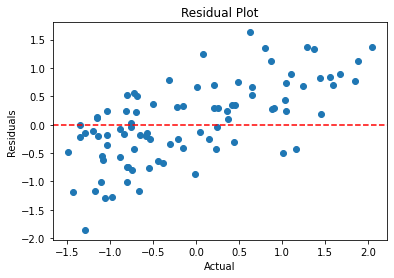

In [67]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.show()

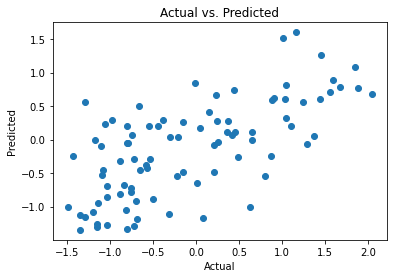

In [66]:

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

## Random Forest Method
After experimenting with the hyperparameters of the random forest function, like the depth of the tree and changing the estimators, we can reduce the errors that pop up.


In [74]:
from sklearn.ensemble import RandomForestRegressor


rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=42)  # You can adjust n_estimators as needed

rf_regressor.fit(X_train, y_train)


y_pred_rf = rf_regressor.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor - Mean Squared Error: {mse_rf:.2f}')
print(f'Random Forest Regressor - R-squared: {r2_rf:.2f}')

Random Forest Regressor - Mean Squared Error: 0.48
Random Forest Regressor - R-squared: 0.46


/var/folders/lj/43m6rj152v1csjppfsbbfm6m0000gn/T/ipykernel_18465/729829150.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


## SUPPORT VECTOR REGRESSOR MODEL (SVR)
In the SVR model we see that the hyperparameter tuning of the arguments like kernel, gamma and epsilon helps reduce the error,

In [78]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel="rbf", gamma=0.09, C=1)
svr_regressor.fit(X_train, y_train)

y_pred_svr = svr_regressor.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Support Vector Regressor - Mean Squared Error: {mse_svr:.2f}')
print(f'Support Vector Regressor - R-squared: {r2_svr:.2f}')

Support Vector Regressor - Mean Squared Error: 0.70
Support Vector Regressor - R-squared: 0.22


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Conclusion remarks
The scope for model improvement is immense. Some of the methods would be :
    1. collecting more data
    2. scaling of features and targets
    3. feature selection via PCA, ANOVA test etc
    4. hyperparameter tuning of the models
    5. cross validation, grid search techniques
    